In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# location to save figures
import os
cwd = os.getcwd()
figure_path = cwd + '/figures/'

# Central and Satellite IA Models

Central galaxies are aligned with the shape of their host halo.  

Satellites are either: 
1. aligned radially within their host halo, 
2. alignmed swith the halo shape, or 
3. a hyrbid of these two models

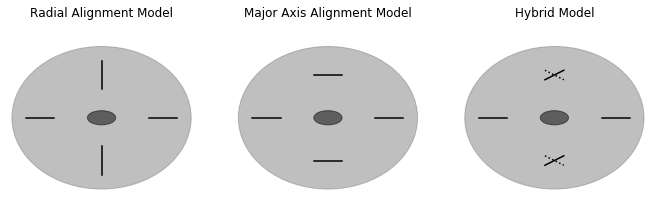

In [3]:
from matplotlib.patches import Circle, Ellipse
from matplotlib.collections import PatchCollection

fig, axes = plt.subplots(1,3, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9)

# left panel
ax = axes[0]
ax.set_title('Radial Alignment Model')

halo = Ellipse((0.0,0.0),1.9, 1.5, color='grey', alpha=0.5)
central = Ellipse((0.0,0.0),0.3, 0.15, color='black', alpha=0.5)
ax.add_artist(halo)
ax.add_artist(central)
ax.plot([0,0],[0.6,0.3], color='black')
ax.plot([0,0],[-0.6,-0.3], color='black')
ax.plot([0.8,0.5],[0,0], color='black')
ax.plot([-0.8,-0.5],[0,0], color='black')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

# center panel
ax = axes[1]
ax.set_title('Major Axis Alignment Model')
halo = Ellipse((0.0,0.0),1.9, 1.5, color='grey', alpha=0.5)
central = Ellipse((0.0,0.0),0.3, 0.15, color='black', alpha=0.5)
ax.add_artist(halo)
ax.add_artist(central)
ax.plot([-0.15,0.15],[0.45,0.45], color='black')
ax.plot([-0.15,0.15],[-0.45,-0.45], color='black')
ax.plot([0.8,0.5],[0,0], color='black')
ax.plot([-0.8,-0.5],[0,0], color='black')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

#right panel
ax = axes[2]
ax.set_title('Hybrid Model')
halo = Ellipse((0.0,0.0),1.9, 1.5, color='grey', alpha=0.5)
central = Ellipse((0.0,0.0),0.3, 0.15, color='black', alpha=0.5)
ax.add_artist(halo)
ax.add_artist(central)
ax.plot([-0.1,0.1],[0.4,0.5], color='black')
ax.plot([-0.1,0.1],[0.5,0.4], ':', color='black')
ax.plot([-0.1,0.1],[-0.5,-0.4], color='black')
ax.plot([-0.1,0.1],[-0.4,-0.5], ':', color='black')
ax.plot([0.8,0.5],[0,0], color='black')
ax.plot([-0.8,-0.5],[0,0], color='black')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

plt.show()

filename = 'satellite_alignment_cartoon.pdf'
fig.savefig(figure_path+filename, dpi=250)

# Stochastic Galaxy Misalignment

A Dimroth-Watson distribution is used to model the misalignment angle distribution.

In [4]:
from watson_dist import DimrothWatson
from intrinsic_alignments.ia_models.ia_model_components import alignment_strength
watson_distribition = DimrothWatson()

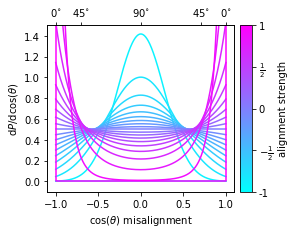

In [5]:
ps = np.linspace(-1,1,21)
colors = np.linspace(0,1,len(ps))

x = np.linspace(-1,1,1000)
fig, ax = plt.subplots(figsize=(4.0,3.3))
fig.subplots_adjust(left=0.15, right=0.8, bottom=0.2, top=0.9)

for i,p in enumerate(ps):
    plt.plot(x, watson_distribition.pdf(x, k=alignment_strength(p)), color=plt.cm.cool(colors[i]))
sc = plt.scatter(colors*0.0, colors*0.0, c=ps, cmap = 'cool', vmin=-1, vmax=1, s=0)
plt.ylim([-0.1,1.5])
plt.xlim([-1.1,1.1])
plt.xlabel(r'$\cos(\theta)$'+' misalignment')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta)$')

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(np.cos(np.radians([0,45,90,135,180])))
ax2.set_xticklabels([r'$0^{\circ}$',r'$45^{\circ}$',r'$90^{\circ}$',r'$45^{\circ}$',r'$0^{\circ}$'])

cax = fig.add_axes([0.82, 0.2, 0.04, 0.7]) 
cbar = fig.colorbar(sc, cax=cax, ticks=[-1,-0.5, 0, 0.5, 1])
cbar.ax.set_yticklabels(['-1',r'$-\frac{1}{2}$', '0', r'$\frac{1}{2}$', '1'])
cbar.ax.set_ylabel('alignment strength')

plt.show()

filename = 'misalignment_model.pdf'
#fig.savefig(figure_path+filename, dpi=250)

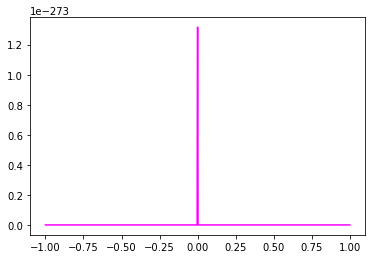

In [6]:
plt.plot(x, watson_distribition.pdf(x, k=alignment_strength(-0.999999999)), color=plt.cm.cool(colors[i]))
#plt.plot(x, watson_distribition.pdf(x, k=alignment_strength(-1)), color=plt.cm.cool(colors[i]))

The shape parameter in the Dimroth-Watson distribution is tranformed using an inverse tangent function.  This parameter is referred to as the alignment strength and can take values between [-1,1].  -1 indicates that galaxies are exactly perpendicularly aligned with the host halo.  0 indicates that galaxies are randomly aligned with the host halo.  1 indicates that galaxies are perfectly aligned with the host halo.

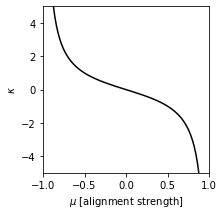

In [7]:
ps = np.linspace(-1,1,100)

fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(ps, alignment_strength(ps), color='black')
plt.ylim([-5,5])
plt.xlim([-1,1])
plt.ylabel(r'$\kappa$')
plt.xlabel(r'$\mu~[{\rm alignment~strength}]$')
plt.show()

filename = 'alignment_strength_legend.pdf'
fig.savefig(figure_path+filename, dpi=250)

# Triaxial NFW Profile

The positions of satellites is modelled with a triaxial NFW profile.  The anisotropy of the satellite distribution has a significatn effect on thealignment correlation functions. 

In [8]:
from intrinsic_alignments.ia_models.anisotropic_nfw_phase_space import AnisotropicNFWPhaseSpace
sats_prof_model = AnisotropicNFWPhaseSpace()

In [9]:
mass, conc, b_to_a, c_to_a,= 1e13, 8., 1.0, 0.3
halo_axisA_x, halo_axisA_y, halo_axisA_z = (1,0,0)
halo_axisC_x, halo_axisC_y, halo_axisC_z = (0,0,1)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sats_table = sats_prof_model.mc_generate_nfw_phase_space_points(Ngals=10000, mass=mass, conc=conc,
                                                                    halo_axisA_x=halo_axisA_x,
                                                                    halo_axisA_y=halo_axisA_y,
                                                                    halo_axisA_z=halo_axisA_z,
                                                                    halo_axisC_x=halo_axisC_x,
                                                                    halo_axisC_y=halo_axisC_y,
                                                                    halo_axisC_z=halo_axisC_z,
                                                           b_to_a=b_to_a, c_to_a=c_to_a,
                                                           verbose=False)
rvir = sats_prof_model.halo_mass_to_halo_radius(mass)

here 1:


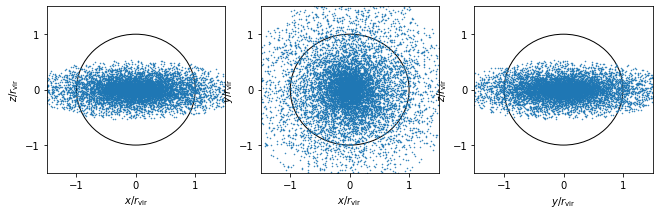

In [10]:
fig, axes = plt.subplots(1,3, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.9)

ax=axes[0]
circle = plt.Circle((0,0),1, fill=False)
ax.add_artist(circle)
ax.plot(sats_table['x']/rvir,sats_table['z']/rvir, '.', alpha=1, ms=1)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_yticks([-1,0,1])
ax.set_xlabel(r'$x/r_{\rm vir}$')
ax.set_ylabel(r'$z/r_{\rm vir}$')

ax=axes[1]
circle = plt.Circle((0,0),1, fill=False)
ax.add_artist(circle)
ax.plot(sats_table['x']/rvir,sats_table['y']/rvir, '.', alpha=1, ms=1)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_yticks([-1,0,1])
ax.set_xlabel(r'$x/r_{\rm vir}$')
ax.set_ylabel(r'$y/r_{\rm vir}$')

ax=axes[2]
circle = plt.Circle((0,0),1, fill=False)
ax.add_artist(circle)
ax.plot(sats_table['y']/rvir,sats_table['z']/rvir, '.', alpha=1, ms=1)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_yticks([-1,0,1])
ax.set_xlabel(r'$y/r_{\rm vir}$')
ax.set_ylabel(r'$z/r_{\rm vir}$')

plt.show()

filename = 'anisotropic_nfw_demo.pdf'
fig.savefig(figure_path+filename, dpi=250)

# HOD + Alignment Model

Here we demonstrate how to add alignments to an empirical model and mesure a set of alignment correlation functions using Halotools.

In [11]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0, version_name='halotools_v0p4')

In [12]:
from halotools.empirical_models import HodModelFactory

# define the central occupatoion model
from halotools.empirical_models import TrivialPhaseSpace, Zheng07Cens
cens_occ_model =  Zheng07Cens()
cens_prof_model = TrivialPhaseSpace()

# define the satellite occupation model
from halotools.empirical_models import Zheng07Sats
from halotools.empirical_models import NFWPhaseSpace, SubhaloPhaseSpace
from intrinsic_alignments.ia_models.anisotropic_nfw_phase_space import AnisotropicNFWPhaseSpace
sats_occ_model =  Zheng07Sats()
#sats_prof_model = AnisotropicNFWPhaseSpace()
sats_prof_model = SubhaloPhaseSpace('satellites', np.logspace(10.5, 15.2, 15))

# define the alignment models
from intrinsic_alignments.ia_models.ia_model_components import CentralAlignment,\
    RadialSatelliteAlignment,  MajorAxisSatelliteAlignment, HybridSatelliteAlignment
central_orientation_model = CentralAlignment(central_alignment_strength=0.5)
satellite_orientation_model = RadialSatelliteAlignment(satellite_alignment_strength=0.85)

# combine model components
model_instance = HodModelFactory(centrals_occupation = cens_occ_model,
                                 centrals_profile = cens_prof_model,
                                 satellites_occupation = sats_occ_model,
                                 satellites_profile = sats_prof_model,
                                 centrals_orientation = central_orientation_model,
                                 satellites_orientation = satellite_orientation_model,
                                 model_feature_calling_sequence = (
                                 'centrals_occupation',
                                 'centrals_profile',
                                 'satellites_occupation',
                                 'satellites_profile',
                                 'centrals_orientation',
                                 'satellites_orientation')
                                )

In [13]:
# populate mock catalog
model_instance.populate_mock(halocat)
print("number of galaxies: ", len(model_instance.mock.galaxy_table))

c:\users\nvana\desktop\northeastern\research\my intrinsic_alignment\intrinsic_alignments\ia_models\ia_model_components.py:189: UserWarning: `central_alignment_strength` not detected in the table, using value in self.param_dict.
  warn(msg)
c:\users\nvana\desktop\northeastern\research\my intrinsic_alignment\intrinsic_alignments\ia_models\ia_model_components.py:592: UserWarning: `satellite_alignment_strength` key not detected in `table`.The value set in self.param_dict of this class will be used instead.
  warn(msg)


number of galaxies:  74707


## Measure Alignment Correlation Functions

In [14]:
# galaxy coordinates and orientations
galaxy_coords = np.vstack((model_instance.mock.galaxy_table['x'],
                           model_instance.mock.galaxy_table['y'],
                           model_instance.mock.galaxy_table['z'])).T

galaxy_orientations = np.vstack((model_instance.mock.galaxy_table['galaxy_axisA_x'],
                                 model_instance.mock.galaxy_table['galaxy_axisA_y'],
                                 model_instance.mock.galaxy_table['galaxy_axisA_z'])).T

# (sub-)halo coordinates and orientations
mask = (halocat.halo_table['halo_mpeak']>10**11.9)
halo_coords = np.vstack((halocat.halo_table['halo_x'],
                           halocat.halo_table['halo_y'],
                           halocat.halo_table['halo_z'])).T

halo_orientations = np.vstack((halocat.halo_table['halo_axisA_x'],
                                 halocat.halo_table['halo_axisA_y'],
                                 halocat.halo_table['halo_axisA_z'])).T

In [15]:
from halotools_ia.correlation_functions import ed_3d, ee_3d
rbins = np.logspace(-1,1.4,20)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

In [16]:
# calculate alignment correlation functions for the galaxies
galaxy_omega = ed_3d(galaxy_coords, galaxy_orientations, galaxy_coords, rbins, period=halocat.Lbox)
galaxy_eta = ee_3d(galaxy_coords, galaxy_orientations, galaxy_coords, galaxy_orientations, rbins, period=halocat.Lbox)

In [17]:
# calculate alignment correlation functions for the haloes
halo_omega = ed_3d(halo_coords[mask], halo_orientations[mask], halo_coords[mask],
                 rbins, period=halocat.Lbox)
halo_eta = ee_3d(halo_coords[mask], halo_orientations[mask], halo_coords[mask], halo_orientations[mask],
                   rbins, period=halocat.Lbox)

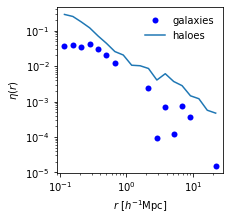

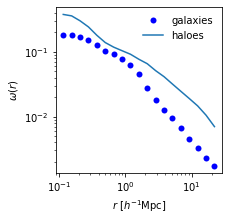

In [18]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, galaxy_eta, 'o', color='blue', mec='none')
p2, = plt.plot(rbin_centers, halo_eta, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.legend([p1,p2],['galaxies','haloes'], frameon=False, loc='upper right', fontsize=10)
plt.show()

filename = 'demo_ed.pdf'
fig.savefig(figure_path+filename, dpi=250)

fig, ax  = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, galaxy_omega, 'o', color='blue', mec='none')
p2, = plt.plot(rbin_centers, halo_omega, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.legend([p1,p2],['galaxies','haloes'], frameon=False, loc='upper right', fontsize=10)
plt.show()

filename = 'demo_ee.pdf'
fig.savefig(figure_path+filename, dpi=250)